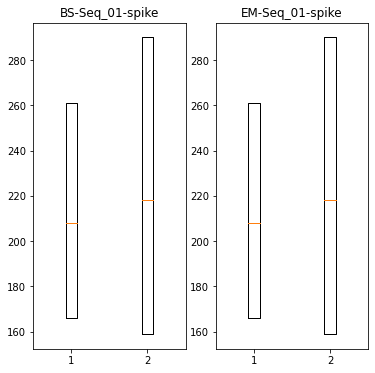

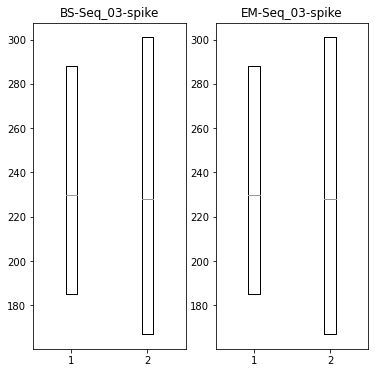

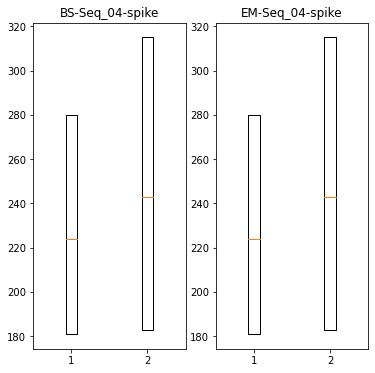

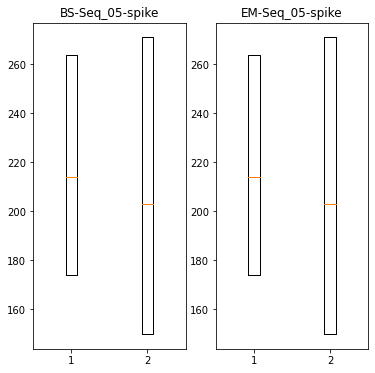

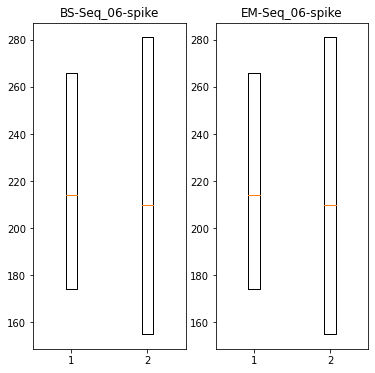

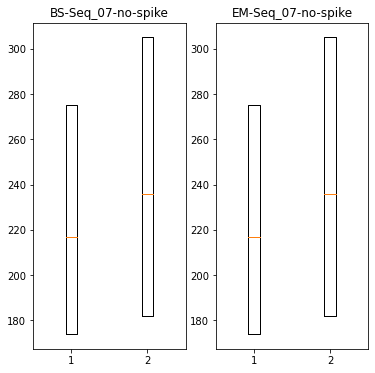

In [81]:
# Shoonhsin Li

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = "frag_text_all.txt"
data = pd.read_csv(filename, sep='\t', index_col=0)
data = data.drop("EM-Seq_02-spike")
BS_seqs = []
EM_seqs = []

for label in data.index:
    if "BS-Seq_" in label:
        BS_seqs.append(label)
    elif "EM-Seq_" in label:
        EM_seqs.append(label)
BS_seqs = sorted(BS_seqs)
EM_seqs = sorted(EM_seqs)
seq_zip = list(zip(BS_seqs, EM_seqs))

for i in range(len(BS_seqs)):
    BS_q1= data.loc[seq_zip[i][0], "25th_ptle"]
    EM_q1 = data.loc[seq_zip[i][1], "25th_ptle"]
    BS_med = data.loc[seq_zip[i][0], "50th_ptle"]
    EM_med = data.loc[seq_zip[i][1], "50th_ptle"]
    BS_q3 = data.loc[seq_zip[i][0], "75th_ptle"]
    EM_q3 = data.loc[seq_zip[i][1], "75th_ptle"]
    BS_dict = {"med": BS_med, "q1": BS_q1, "q3": BS_q3, "whislo": BS_q1, "whishi": BS_q3}
    EM_dict = {"med": EM_med, "q1": EM_q1, "q3": EM_q3, "whislo": EM_q1, "whishi": EM_q3}
    dict = [BS_dict, EM_dict]
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
    axs[0].bxp(dict, showfliers=False)
    axs[0].set_title(seq_zip[i][0])

    axs[1].bxp(dict, showfliers=False)
    axs[1].set_title(seq_zip[i][1])
    plt.savefig("{}_{}.pdf".format(seq_zip[i][0], seq_zip[i][1]))
plt.show()


    



In [44]:
# ignore for now

BS_lbls = []
BS_nums = set()
EM_lbls = []
EM_nums = set()
for i in range(len(BS_seqs)):
    BS_split = BS_seqs[i].split('-')
    EM_split = EM_seqs[i].split('-')
    BS_nums.add(BS_split[1])
    EM_nums.add(EM_split[1])
    BS_lbls.append((BS_split[0], BS_split[2]))
    EM_lbls.append((EM_split[0], EM_split[2]))

nums = BS_nums.intersection(EM_nums)
print(EM_nums, BS_nums, nums)


{'Seq_06', 'Seq_07', 'Seq_02', 'Seq_04', 'Seq_01', 'Seq_03'} {'Seq_06', 'Seq_07', 'Seq_04', 'Seq_03', 'Seq_01', 'Seq_05'} {'Seq_06', 'Seq_07', 'Seq_04', 'Seq_01', 'Seq_03'}
